### 4. Clustering

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
c_data = pd.read_csv('../Data/c_data_preprocess.csv')
scaled_c_data = pd.read_csv('../Data/c_data_scaled.csv')

In [3]:
c_data.head(3)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Total_Expenses,Children,Age,Relationship Status,TotalAcceptedCmp,NumTotalPurchases,Customer_Day
0,Undergraduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,1617,0,64,Single,1,22,971
1,Undergraduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,27,2,67,Single,0,4,125
2,Undergraduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,776,0,56,Couple,0,20,472


In [4]:
scaled_c_data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalAcceptedCmp,NumTotalPurchases,Customer_Day,Education_Highschool,Education_Master,Education_PhD,Education_Undergraduate,Relationship Status_Couple,Relationship Status_Single
0,0.288513,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,...,1.016868,0.620456,1.312080,1.975467,0,0,0,1,0,1
1,-0.262438,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,...,1.273264,-0.501987,-1.186198,-1.667017,0,0,0,1,0,1
2,0.917992,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,...,0.333146,-0.501987,1.034493,-0.172996,0,0,0,1,1,0
3,-1.182621,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,...,-1.290693,-0.501987,-0.908611,-1.925349,0,0,0,1,1,0
4,0.295754,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,...,-1.034298,-0.501987,0.201734,-0.823131,0,0,1,0,1,0


In [20]:
scaled_c_data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalAcceptedCmp,NumTotalPurchases,Customer_Day,Education_Highschool,Education_Master,Education_PhD,Education_Undergraduate,Relationship Status_Couple,Relationship Status_Single
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,...,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,2.235776e-16,-6.057567e-17,-2.750731e-17,1.058088e-16,-3.612197e-17,-1.122140e-17,3.426001e-17,1.516874e-17,-7.539685e-17,-3.800875e-17,...,8.699064e-17,1.783010e-16,7.209498e-17,8.123099e-17,0.02415,0.255367,0.216905,0.503578,0.644902,0.355098
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,0.15355,0.436165,0.412230,0.500099,0.478650,0.478650
min,-2.346560e+00,-1.696543e+00,-9.037519e-01,-6.616104e-01,-7.400464e-01,-6.870194e-01,-6.558568e-01,-8.450157e-01,-1.203575e+00,-1.470716e+00,...,-2.316276e+00,-5.019873e-01,-1.741370e+00,-2.205209e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.688934e-01,-8.675502e-01,-8.324330e-01,-6.364311e-01,-6.691367e-01,-6.321109e-01,-6.316380e-01,-6.721048e-01,-6.861374e-01,-7.511269e-01,...,-6.924366e-01,-5.019873e-01,-9.086112e-01,-7.380971e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.298227e-02,-4.016436e-03,-3.866896e-01,-4.601758e-01,-4.431121e-01,-4.673854e-01,-4.621065e-01,-3.839200e-01,-1.686996e-01,-3.153832e-02,...,-9.417994e-02,-5.019873e-01,-7.585209e-02,3.531464e-03,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.620935e-01,8.595173e-01,5.946886e-01,1.693073e-01,2.881439e-01,2.281224e-01,1.433631e-01,2.308744e-01,3.487383e-01,6.880503e-01,...,8.459377e-01,6.204563e-01,7.569070e-01,7.483892e-01,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,5.158923e+00,1.723051e+00,3.532880e+00,4.349075e+00,6.904903e+00,4.053415e+00,5.713683e+00,6.109845e+00,6.557993e+00,8.243731e+00,...,2.469777e+00,5.110231e+00,2.700011e+00,2.371576e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = scaled_c_data.values

### Choosing K: The Elbow Method

/Users/Atabay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


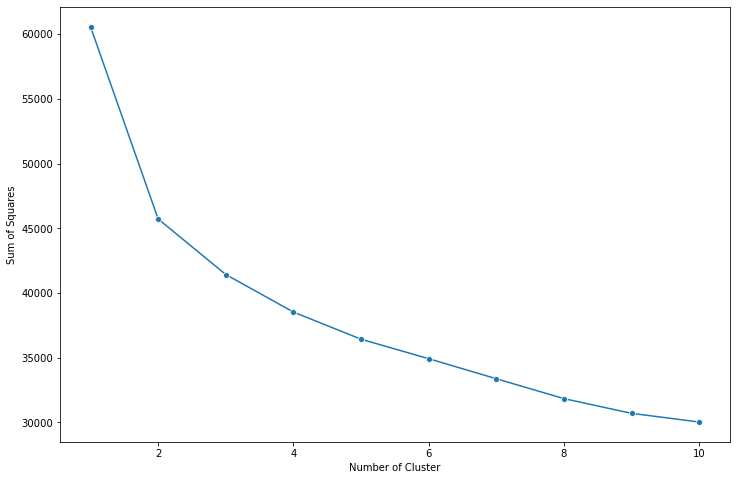

In [19]:
from sklearn.cluster import KMeans
import numpy as np
ss = []
k_dict = {}
k_range = list(range(1,11))
for k in k_range:
    model = KMeans(n_clusters = k)
    cluster = model.fit_predict(X)
    center = model.cluster_centers_
    ss.append(np.sum((X - center[cluster]) ** 2))
    k_dict[str(k)] = cluster
plt.figure(figsize= (12,8))
_ = sns.lineplot(k_range, ss, marker='o')
_ = plt.xlabel("Number of Cluster")
_ = plt.ylabel("Sum of Squares")

There is an elbow at 2. Therefore, 2 might be optimal number of clusters.

### Choosing K: The Silhouette Method 

In [7]:
from sklearn.metrics import silhouette_score
silhouette = []
k_range = list(range(2,11))
for n_clusters in k_range:
    model = KMeans(n_clusters = n_clusters)
    cluster = model.fit_predict(X)
    silhouette.append(silhouette_score(X, cluster))
    print ('for',n_clusters,'number of cluster the silhoutte score is:', silhouette_score(X,cluster))

for 2 number of cluster the silhoutte score is: 0.2749105811167212
for 3 number of cluster the silhoutte score is: 0.24626824235897787
for 4 number of cluster the silhoutte score is: 0.1847502244348068
for 5 number of cluster the silhoutte score is: 0.19037130334575839
for 6 number of cluster the silhoutte score is: 0.19144128221991902
for 7 number of cluster the silhoutte score is: 0.07648493683148418
for 8 number of cluster the silhoutte score is: 0.14310574954199226
for 9 number of cluster the silhoutte score is: 0.15823540431892477
for 10 number of cluster the silhoutte score is: 0.09710042924587743


In [42]:
#Looking at silhoutte score of AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
silhouette = []
k_range = list(range(2,11))
for n_clusters in k_range:
    model = AgglomerativeClustering(n_clusters = n_clusters)
    cluster = model.fit_predict(X)
    silhouette.append(silhouette_score(X, cluster))
    print ('for',n_clusters,'number of cluster the silhoutte score is:', silhouette_score(X,cluster))

for 2 number of cluster the silhoutte score is: 0.2611679824605767
for 3 number of cluster the silhoutte score is: 0.22594694897124692
for 4 number of cluster the silhoutte score is: 0.14593940972964606
for 5 number of cluster the silhoutte score is: 0.15443028089454713
for 6 number of cluster the silhoutte score is: 0.15458850774511113
for 7 number of cluster the silhoutte score is: 0.15330837322323057
for 8 number of cluster the silhoutte score is: 0.13345703608435025
for 9 number of cluster the silhoutte score is: 0.13746862447243247
for 10 number of cluster the silhoutte score is: 0.14129737312037835


Text(0, 0.5, 'Average Silhouette Score')

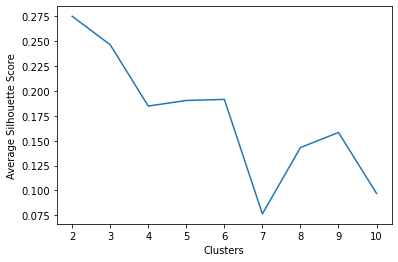

In [8]:
plt.plot(k_range, silhouette)
plt.xlabel("Clusters")
plt.ylabel("Average Silhouette Score")

K = 2 has the highest silhouette score

### 4.1 Visualizing Clusters using PCA

We have 32 features. We can use dimensionality reduction to plot our clusters on the coordinate plane. 

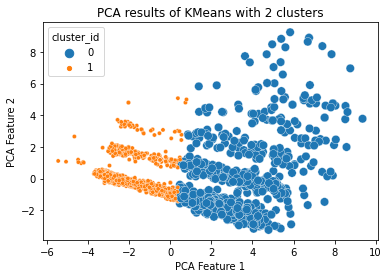

In [9]:
from sklearn.decomposition import PCA

# Calculating the top two PCA features. 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
x = pca_features[:,0]
y = pca_features[:,1]

K=2

kmeans = KMeans(n_clusters=K, random_state=10)
cl_labels = kmeans.fit_predict(X)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y})
ax = sns.scatterplot(x='pc_1', y='pc_2', 
                hue='cluster_id', 
                size='cluster_id', 
                data=df_pca_features, 
                legend='full')

ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(K) + ' clusters');

There is some overlap in clusters but mostly they are separate easy to identify 

### Insights and Patterns from Data

In [10]:
#Adding clusters to our data
c_data["Clusters"] = cl_labels

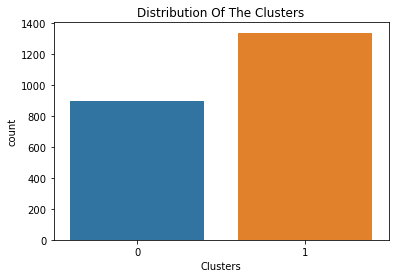

In [11]:
pl = sns.countplot(x=c_data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

It would be better to have clusters that are closer in count, but the difference is not too much so it should not be a problem.

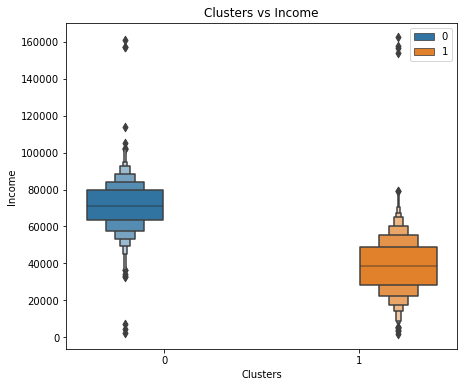

In [52]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxenplot(x=c_data["Clusters"], y=c_data["Income"],hue=c_data["Clusters"])
plt.title("Clusters vs Income")
plt.legend()
plt.show()

Cluster 0 has higher income than cluster 1

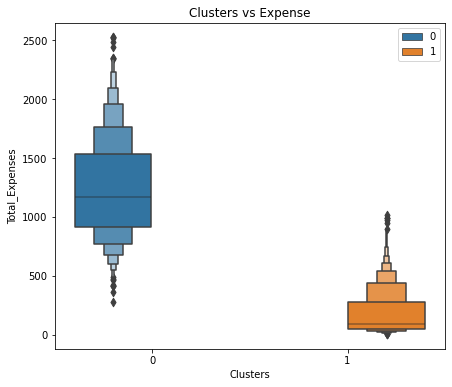

In [53]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxenplot(x=c_data["Clusters"], y=c_data["Total_Expenses"],hue=c_data["Clusters"])
plt.title("Clusters vs Expense")
plt.legend()
plt.show()

Cluster 0 has significantly higher total expense than cluster 1

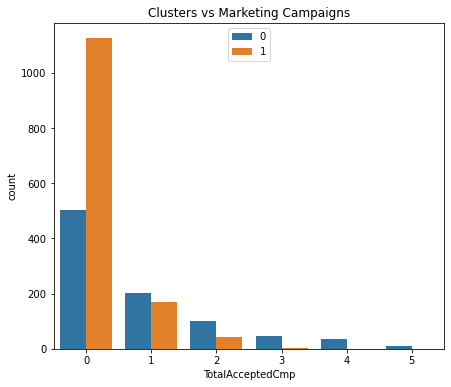

In [49]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.countplot(x=c_data["TotalAcceptedCmp"],hue=c_data["Clusters"])
plt.title("Clusters vs Marketing Campaigns")
plt.legend()
plt.show()

Both clusters don't have a high marketing campaign acceptance rate but Cluster 0 more responsive to the campaigns than cluster 1.  

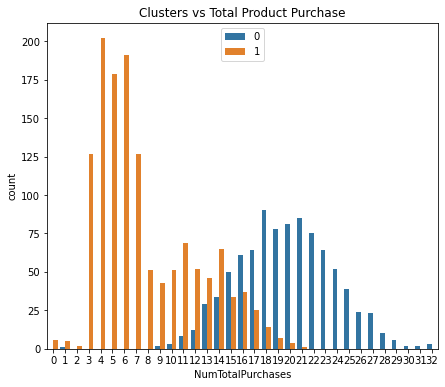

In [86]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.countplot(x=c_data["NumTotalPurchases"],hue=c_data["Clusters"])
plt.title("Clusters vs Total Product Purchase")
plt.legend()
plt.show()

Cluster 0 has more total product purchase than cluster 1

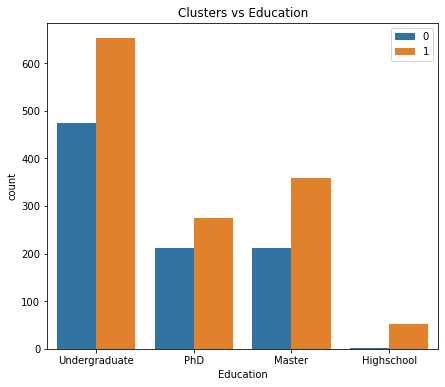

In [72]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.countplot(x=c_data["Education"], hue=c_data["Clusters"])
plt.title("Clusters vs Education")
plt.legend()
plt.show()

Cluster 0 is slightly more educated than cluster 1 

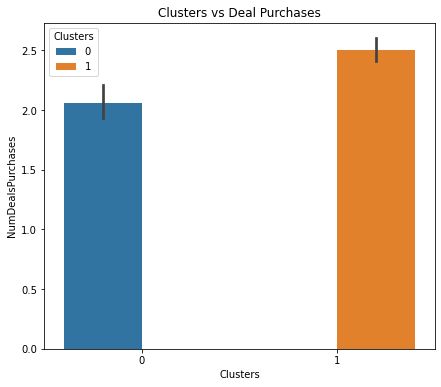

In [98]:
plt.figure(figsize=(7, 6))
sns.barplot(x=c_data["Clusters"], y=c_data["NumDealsPurchases"], hue=c_data["Clusters"])
plt.title("Clusters vs Deal Purchases")
plt.show()

Cluster 1 made more purchases using discounts 

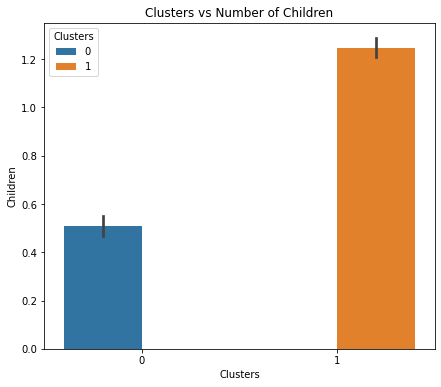

In [100]:
plt.figure(figsize=(7, 6))
sns.barplot(x=c_data["Clusters"], y=c_data["Children"], hue=c_data["Clusters"])
plt.title("Clusters vs Number of Children")
plt.show()

Cluster 1 has more children than cluster 0

In [92]:
c_data.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Expenses', 'Children',
       'Age', 'Relationship Status', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Customer_Day', 'Clusters'],
      dtype='object')

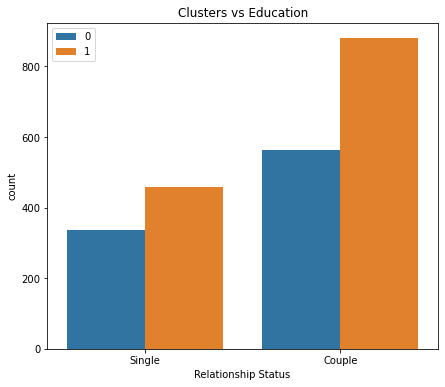

In [95]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.countplot(x=c_data["Relationship Status"], hue=c_data["Clusters"])
plt.title("Clusters vs Education")
plt.legend()
plt.show()

Both clusters have a similar relationship pattern


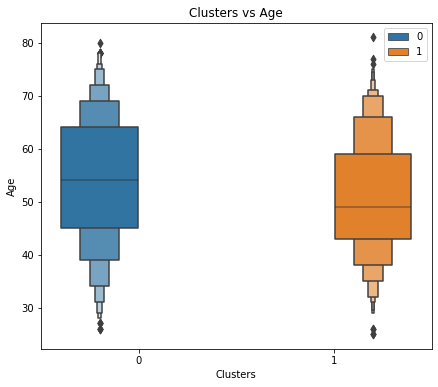

In [102]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxenplot(x=c_data["Clusters"], y=c_data["Age"],hue=c_data["Clusters"])
plt.title("Clusters vs Age")
plt.legend()
plt.show()

Median age for cluster 0 is higher than cluster 1

### Results

#### Cluster 0:
- High socioeconomic status
- Very high total expenditure
- Modarate marketing campaign accaptance rate
- Less discount purchases
- Slightly more educated
- Older population

#### Cluster 1:
- Lower socioeconomic status
- Significantly lower total expenditure
- Low marketing campaign accaptance rate
- More discount purchases
- Slightly less educated
- Younger population